In [10]:
# imports
import geopandas as gpd
import pysal as ps
import numpy as np
import sys
import math
import scipy.linalg
import scipy.sparse
import networkx as nx
import random
import matplotlib.pyplot as plt
import csv
import utm
from colormap import rgb2hex
import stateplane
import networkx.linalg.spectrum

In [11]:
state_no = '37'

In [12]:


adj = scipy.sparse.load_npz('adj_mats/'+state_no + '_full.npz').todense().astype(int)
G = nx.from_numpy_matrix(adj)
lap = networkx.normalized_laplacian_matrix(G).todense()
evals = np.real(scipy.linalg.eigvals(lap).tolist())
print([x for x in evals if x<0])
#evals2.sort()

[]


In [ ]:
adj2 = scipy.sparse.load_npz('adj_mats/'+state_no + '_blocks.npz').todense().astype(int)
G2 = nx.from_numpy_matrix(adj2)
lap2 = networkx.normalized_laplacian_matrix(G2).todense()
evals2 = np.real(scipy.linalg.eigvals(lap2).tolist())
print([x for x in evals2 if x<0])
#evals2.sort()

In [15]:
adj3 = scipy.sparse.load_npz('adj_mats/'+state_no + '_blocks12.npz').todense().astype(int)
G3 = nx.from_numpy_matrix(adj3)
lap3 = networkx.normalized_laplacian_matrix(G3).todense()
evals3 = np.real(scipy.linalg.eigvals(lap3).tolist())
print([x for x in evals3 if x<0])

[-1.465841337200402e-16, -4.822531263215524e-16, -8.3861399987596e-16, -2.8074390058878585e-16, -2.2410174607769435e-15, -1.6653345369377348e-15, -1.7820144858283595e-17, -5.955556258986184e-16]


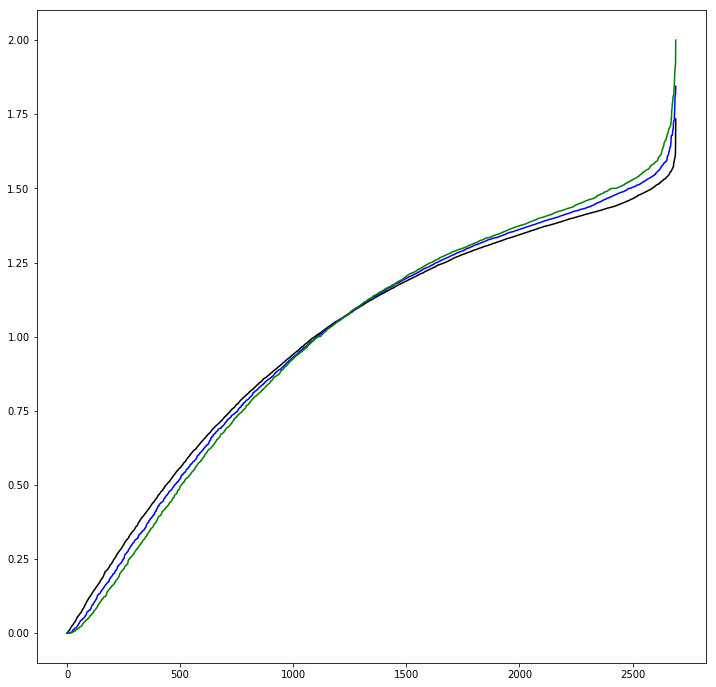

In [16]:
evals.sort()
evals2.sort()
evals3.sort()
plt.figure(figsize=(12,12))
plt.plot(range(len(evals)),evals,color='k')
plt.plot(range(len(evals2)),evals2,color='b')
plt.plot(range(len(evals3)),evals3,color='g')


[1.58648125 1.58737612 1.5876096  1.58869641 1.59106145 1.59109251
 1.59133126 1.59150104 1.59263567 1.59264954 1.59785662 1.59861835
 1.60866971 1.60953729 1.60968039 1.61078751 1.61174882 1.61590378
 1.62063804 1.622618   1.62463115 1.62478977 1.63587962 1.63624469
 1.63872485 1.63972154 1.64238084 1.64738303 1.65793538 1.67695726
 1.67772936 1.67785622 1.67908188 1.67918976 1.67979655 1.68813897
 1.69781647 1.69953632 1.70085642 1.72156884 1.72754152 1.72835621
 1.72964822 1.73409708 1.76326488 1.80276984 1.81006829 1.81482549
 1.81586604 1.84419231]


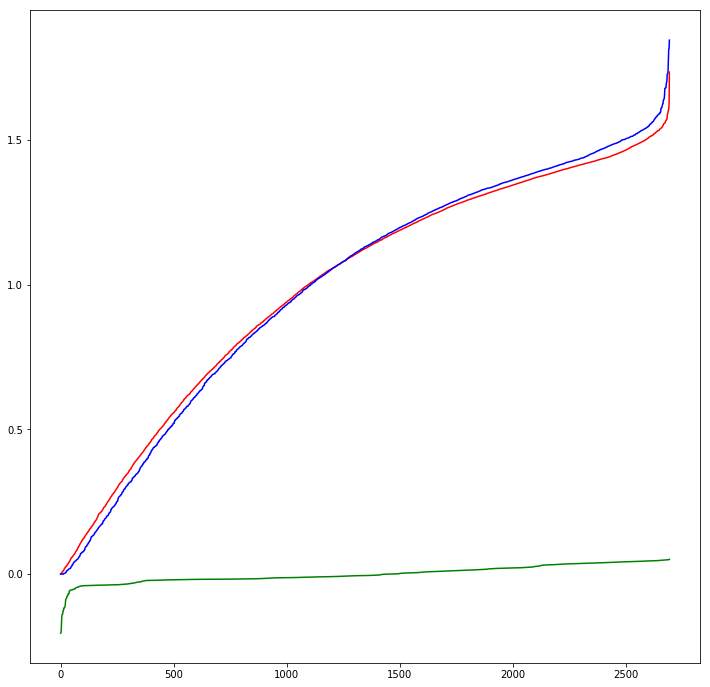

1.8441923117265144

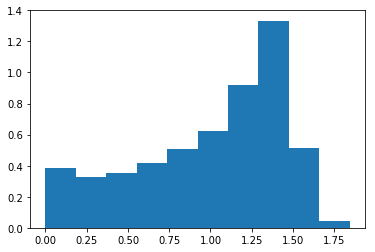

In [6]:
plt.hist(evals2,density=True)
np.mean(evals2)
np.max(evals2)

[]
[-1.0061396160665481e-16, -1.7976072019809664e-16]


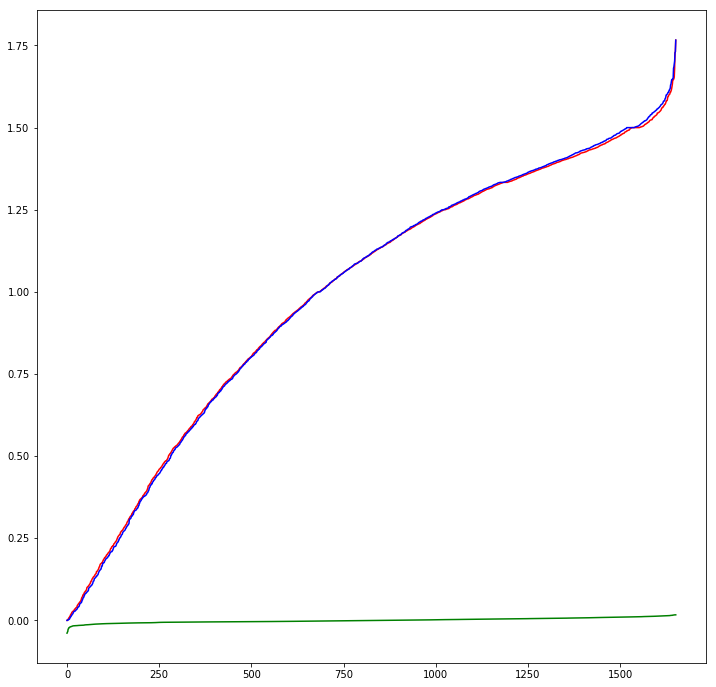

In [7]:
state_no = '31'

adj = scipy.sparse.load_npz('adj_mats/'+state_no + '_full.npz').todense().astype(int)
G = nx.from_numpy_matrix(adj)
lap = networkx.normalized_laplacian_matrix(G).todense()
evals = np.real(scipy.linalg.eigvals(lap).tolist())
print([x for x in evals if x<0])
#evals2.sort()


adj2 = scipy.sparse.load_npz('adj_mats/'+state_no + '_blocks.npz').todense().astype(int)
G2 = nx.from_numpy_matrix(adj2)
lap2 = networkx.normalized_laplacian_matrix(G2).todense()
evals2 = np.real(scipy.linalg.eigvals(lap2).tolist())
print([x for x in evals2 if x<0])
#evals2.sort()


evals.sort()
evals2.sort()
plt.figure(figsize=(12,12))
plt.plot(range(len(evals)),evals,color='r')
plt.plot(range(len(evals2)),evals2,color='b')
diff = [x-y for x,y in zip(evals,evals2)]
diff.sort()
plt.plot(range(len(evals)),diff,color='g')


1.7663092077132077

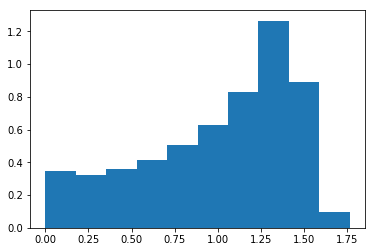

In [8]:
plt.hist(evals2,density=True)
np.mean(evals2)
np.max(evals2)